<a href="https://colab.research.google.com/github/ttjh1234/Visualization/blob/main/visualizationwithplt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화 도구

파이썬에서 사용하는 시각화 도구로 matplotlib, seaborn, folium 이 있다.

이번에 정리할 내용은 파이썬의 matplotlib로 기본적인 시각화 도구들이다. 

1. 선 그래프
2. 면적 그래프
3. 막대 그래프
4. 히스토그램
5. 산점도
6. 파이 차트 
7. 박스 플롯



## 데이터 준비 및 가공

통계청에서 제공하는 시도 간 인구 이동 데이터셋을 가지고, 서울특별시에서 다른 지역으로 이동한 인구 그래프를 그릴 것이다.

따라서 처음 전출지가 서울특별시이고 전입시가 서울특별시가 아닌 것들을 추출하고, 간단한 데이터 조작을 통해 분석에 필요한 데이터들만 가져온다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_excel('시도별 전출입 인구수.xlsx',header=0)

df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [2]:
# 누락값을 앞 데이터로 채움
df=df.fillna(method='ffill')
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask=(df.전출지별=='서울특별시')&(df.전입지별!='서울특별시')
df_seoul=df[mask]
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [3]:
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,16281,19028,19496,17689,20291,18790,18989,18310,16685,19470,17463,16154,15163,14727,15557,14005,14366,14871,14277,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,4545,4413,4563,4105,4266,4085,4456,4252,4227,4656,4801,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2998,2851,6481,7550,5943,5813


In [4]:
sr_one=df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

## 선 그래프

선 그래프는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타낸다.

특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다.


plt에 매개변수를 지정하는 방법은 크게 2가지 방법이있다.

x,y축에 들어갈 데이터들을 직접 넣어주던가, 아니면 시리즈 또는 데이터프레임 객체를 직접 입력해도 가능하다.

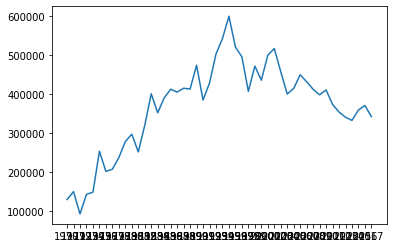

In [5]:
plt.plot(sr_one.index,sr_one.values)
plt.show()

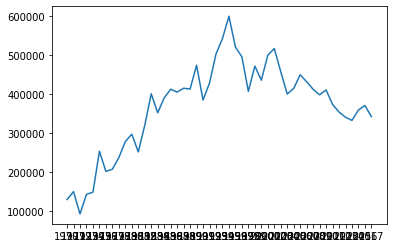

In [6]:
plt.plot(sr_one)
plt.show()

이런 식으로 표현하면 데이터의 추이를 볼 수 있는데, xlabel이 무엇을 의미하는지, 어떤 값을 알고 있는지 알 수 없다. 

따라서 기본적인 제목, x축 명, y축 명을 추가하도록 하겠다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

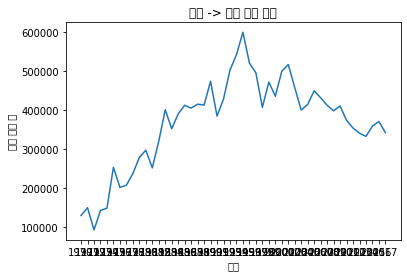

In [7]:
plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('연도')
plt.ylabel('이동 인구 수')
plt.show()

### 한글 폰트 적용하기 with Colab

Matplotlib에서는 한글을 사용할 때 글자가 깨지는 현상이 발생한다.

따라서 한글을 사용한 그래프를 출력할 시 한글 폰트를 미리 지정하는 코드가 필요하다.

구글 코랩으로 한글 폰트를 다운 받는 방법은 os 레벨의 명령을 사용하여야 한다.

일단 한글이 되는 나눔 폰트를 apt-get install 명령으로 설치한다.



In [8]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [9]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share

설치 완료 후에 잘 설치가 되어있는지 확인해본다.

이제 한글 폰트를 적용해보겠다.

In [10]:
from matplotlib import rc
path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
rc('font',family=font_name)
fm._rebuild()

NanumGothic Eco


이 후 런타임을 다시 시작시켜 적용이 되는 것을 볼 수 있다.

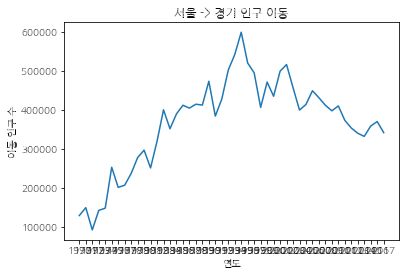

In [11]:
plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('연도')
plt.ylabel('이동 인구 수')
plt.show()

위의 그림을 보면 한글의 해상도가 낮은 것을 알 수 있다.

이를 해결하기위해 retina 설정을 하면 된다.

In [12]:
%config InlineBackend.figure_format= 'retina'

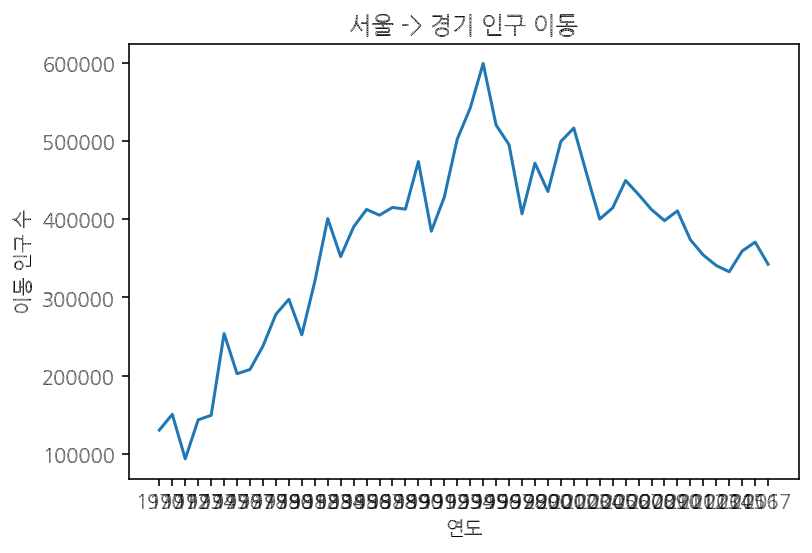

In [13]:
plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('연도')
plt.ylabel('이동 인구 수')
plt.show()

한글 해상도가 되게 깔끔해진것을 볼 수 있다. 이제 여러가지 그래프 꾸미는 법을 알아보겠다.

### 그래프 꾸미기

그래프를 조금 더 잘 알아볼 수 있게 하기 위한 여러가지 방법을 학습한다.

1. figsize() 함수를 이용한 그림틀의 가로,세로 사이즈 설정
2. xticks() 함수를 사용하여 x축 눈금 라벨을 반시계 방향으로 회전
3. legend() 함수를 사용하여 범례 표시
4. style.use() 함수를 사용하여 Matplotlib의 스타일 서식 지정 
5. annotate() 함수를 사용하여 주석 사용
6. subplot을 사용하여 한 화면에 분할된 그래프 그리기

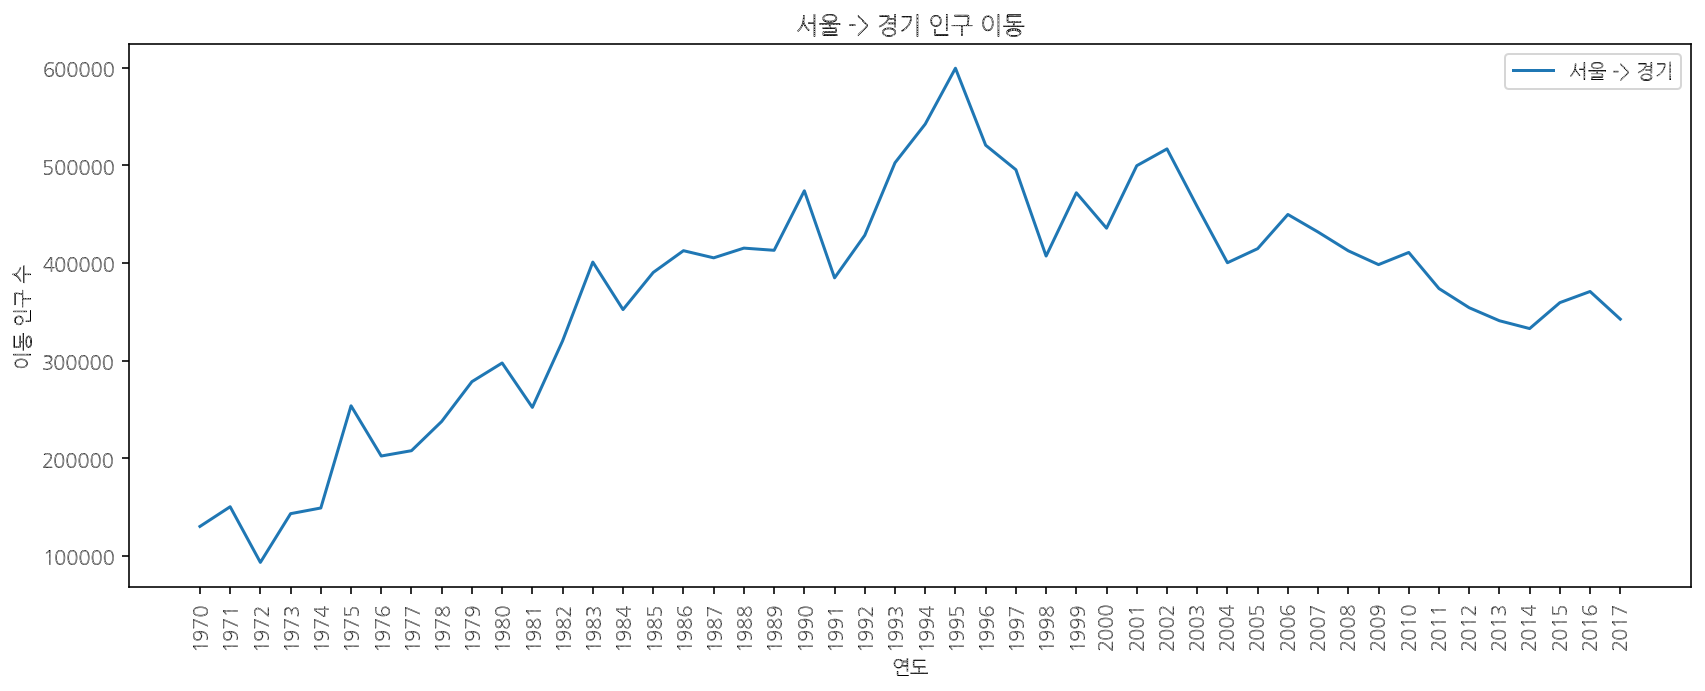

In [14]:
# 그림 사이즈 지정 (가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')
# plt.xticks(ratation=90)과 동일, 반시계방향으로 90도 회전을 의미
plt.plot(sr_one.index,sr_one.values)
plt.xlabel('연도')
plt.ylabel('이동 인구 수')
plt.title('서울 -> 경기 인구 이동')
#범례 표시 , loc='best'로 지정하면 상단에 표시
plt.legend(labels=['서울 -> 경기'],loc='best')
plt.show()

스타일 서식을 **ggplot** 으로 지정하고, 각 축 이름 및 범례, 제목의 크기를 조정해준다. 

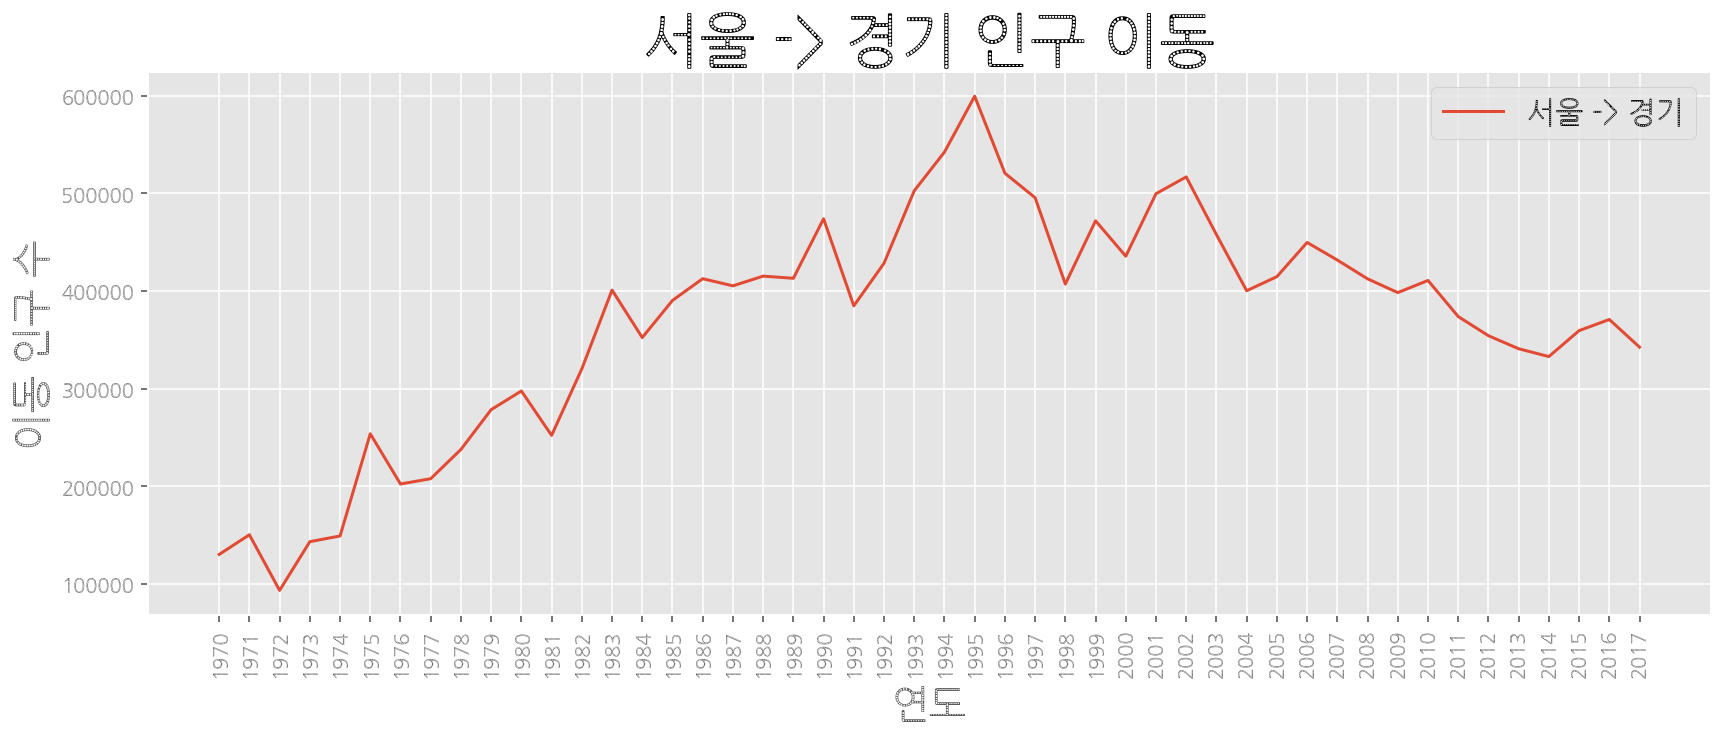

In [15]:
# 스타일 서식 지정
# 스타일 리스트를 볼 경우 코드
# print(plt.stype.available)
# 스타일이 어떻게 적용되는지 상세한 정보는 https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html 을 통해 확인한다.
plt.style.use('ggplot')
# 한 번 실행 환경을 바꾸게 되면 다른 파일을 실행할 때도 계속 적용되는 점을 유의한다.
plt.figure(figsize=(14,5))
plt.xticks(size=10,rotation=90)
plt.plot(sr_one)
plt.xlabel('연도',size=20)
plt.ylabel('이동 인구 수',size=20)
plt.title('서울 -> 경기 인구 이동',size=30)
plt.legend(['서울 -> 경기'],loc='best',fontsize=15)
plt.show()

이제 주석을 달아보도록 한다.

주석 내용을 넣을 위치와 정렬 방법 등을 annotate() 함수에 함께 전달한다.

arrowprops 옵션을 사용하면 텍스트 대신 화살표가 표시된다. 이 때 화살표 스타일,
시작점과 끝점의 좌표를 입력한다.



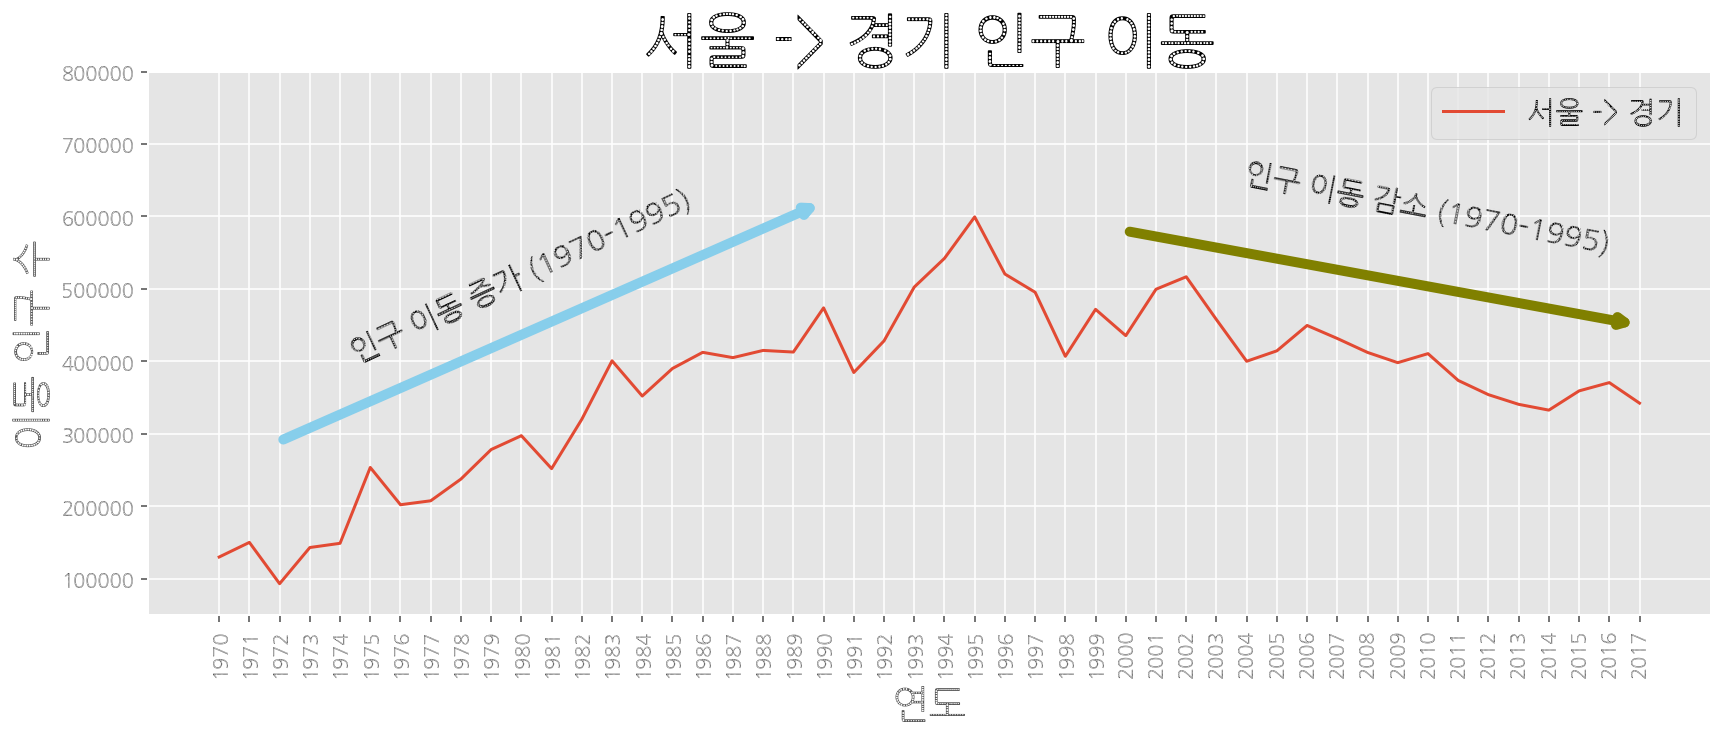

In [16]:
plt.figure(figsize=(14,5))
plt.xticks(size=10,rotation=90)
plt.plot(sr_one)
plt.xlabel('연도',size=20)
plt.ylabel('이동 인구 수',size=20)
plt.title('서울 -> 경기 인구 이동',size=30)
plt.legend(['서울 -> 경기'],loc='best',fontsize=15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000,800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20,620000), # 화살표의 머리 부분 (끝점)
             xytext=(2,290000), # 화살표의 꼬리 부분 (시작점)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->',color='skyblue',lw=5) # 화살표 서식
             )

plt.annotate('',
             xy=(47,450000), # 화살표의 머리 부분 (끝점)
             xytext=(30,580000), # 화살표의 꼬리 부분 (시작점)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->',color='olive',lw=5) # 화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가 (1970-1995)', # 텍스트 입략
             xy=(10,400000), # 텍스트 위치 기준점
             rotation=25, # 텍스트 회전 각도
             va='baseline', # 텍스트 상하 정렬
             ha='center', # 텍스트 좌우 정렬
             fontsize=15 # 텍스트 크기
             )

plt.annotate('인구 이동 감소 (1970-1995)', # 텍스트 입략
             xy=(40,550000), # 텍스트 위치 기준점
             rotation=-11, # 텍스트 회전 각도
             va='baseline', # 텍스트 상하 정렬
             ha='center', # 텍스트 좌우 정렬
             fontsize=15 # 텍스트 크기
             )

plt.show()

이제 화면 분할을 통해 그래프를 그려보겠다.

화면 분할을 하는 방법은 두 가지가 있다.
1. figure 객체를 생성하고, figure 객체의 add_subplot()함수를 사용하여 그래프 객체 만들기

2. 한 번에 fig, ax = figure.subplots(row,columns,figsize=(,)) 함수를 사용하기


ax 객체를 사용하면, 기존의 plt의 함수가 아닌 새로운 이름의 함수들을 사용해야한다.

plt.xlabel() = ax.set_xlabel()

plt.ylabel() = ax.set_ylabel()

plt.title() = ax.set_title()

plt.xticks() = ax.set_xticklabels()

축 눈금 라벨 크기 = ax.tick_params(axis='x',labelsize=)

여기에서는 첫 번째 방법을 사용하여 그려보겠다.

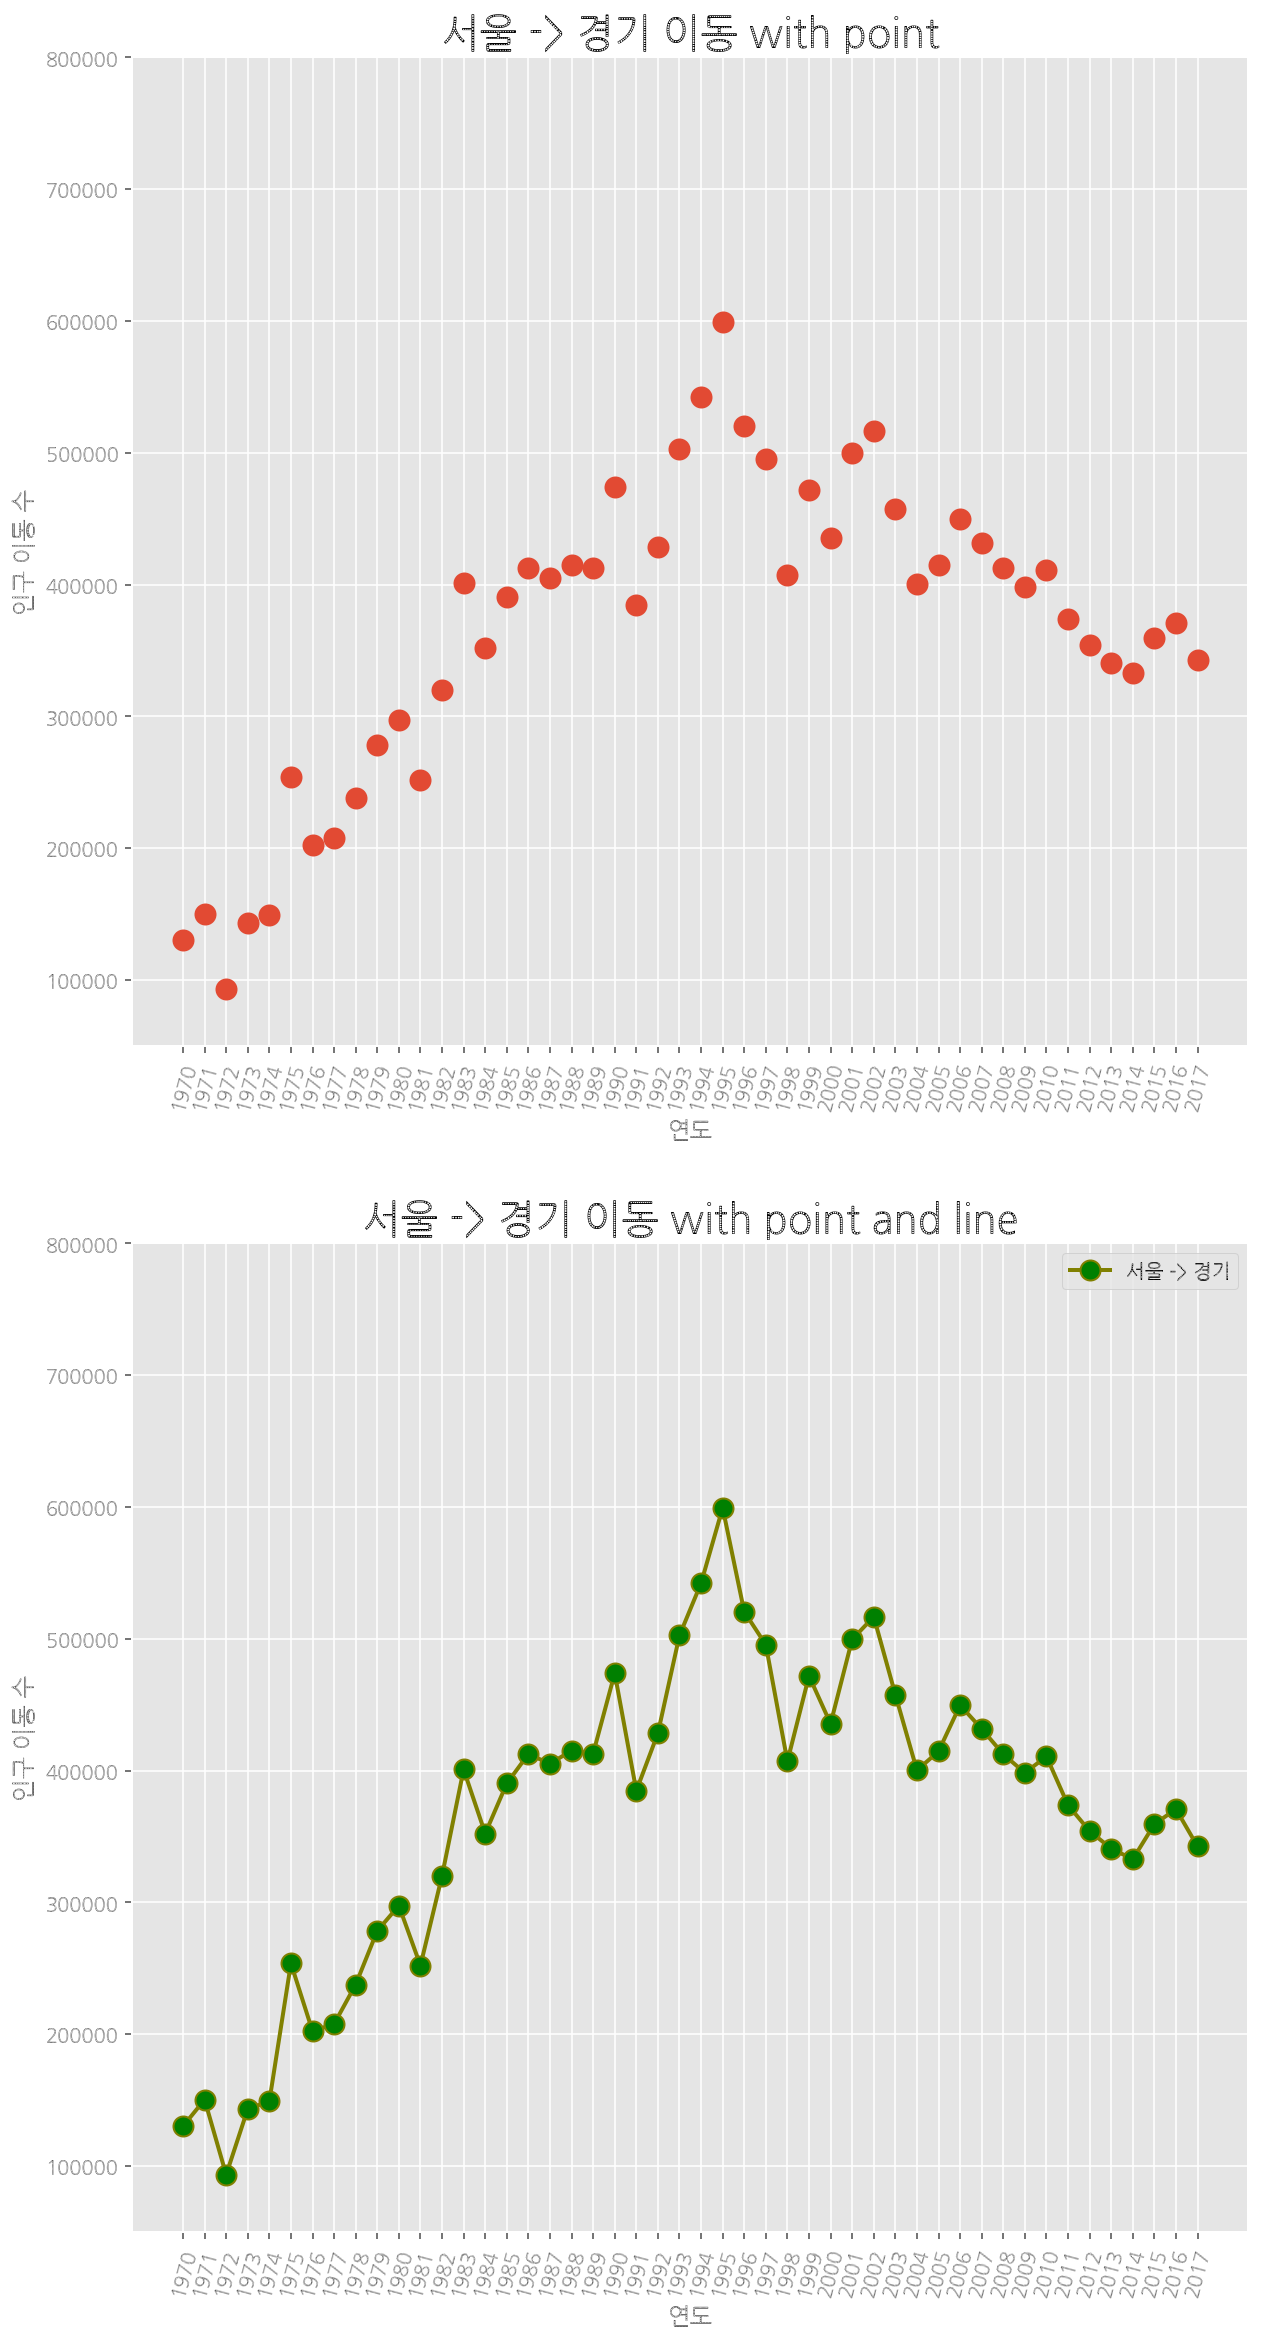

In [17]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯 설정)
fig = plt.figure(figsize=(10,20))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one,marker='o',markerfacecolor='green',markersize=10,color='olive',linewidth=2,label='서울 -> 경기')
ax2.legend(loc='best')
# y축 범위 지정
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)
# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index,rotation=75)
ax2.set_xticklabels(sr_one.index,rotation=75)
# 축 이름 추가
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('인구 이동 수',size=12)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('인구 이동 수',size=12)
# 축 눈금 라벨 크기
ax1.tick_params(axis='x',labelsize=10)
ax1.tick_params(axis='y',labelsize=10)
ax2.tick_params(axis='x',labelsize=10)
ax2.tick_params(axis='y',labelsize=10)
# 그래프 제목 지정
ax1.set_title('서울 -> 경기 이동 with point', size=20)
ax2.set_title('서울 -> 경기 이동 with point and line', size=20)
plt.show()


한 개의 플롯에 2가지 이상의 그래프를 중첩시킬 수도 있다.

여기서는 데이터를 서울에서 충남,경북,강원도로 이동한 인구수를 하나의 그래프로 그려보겠다.

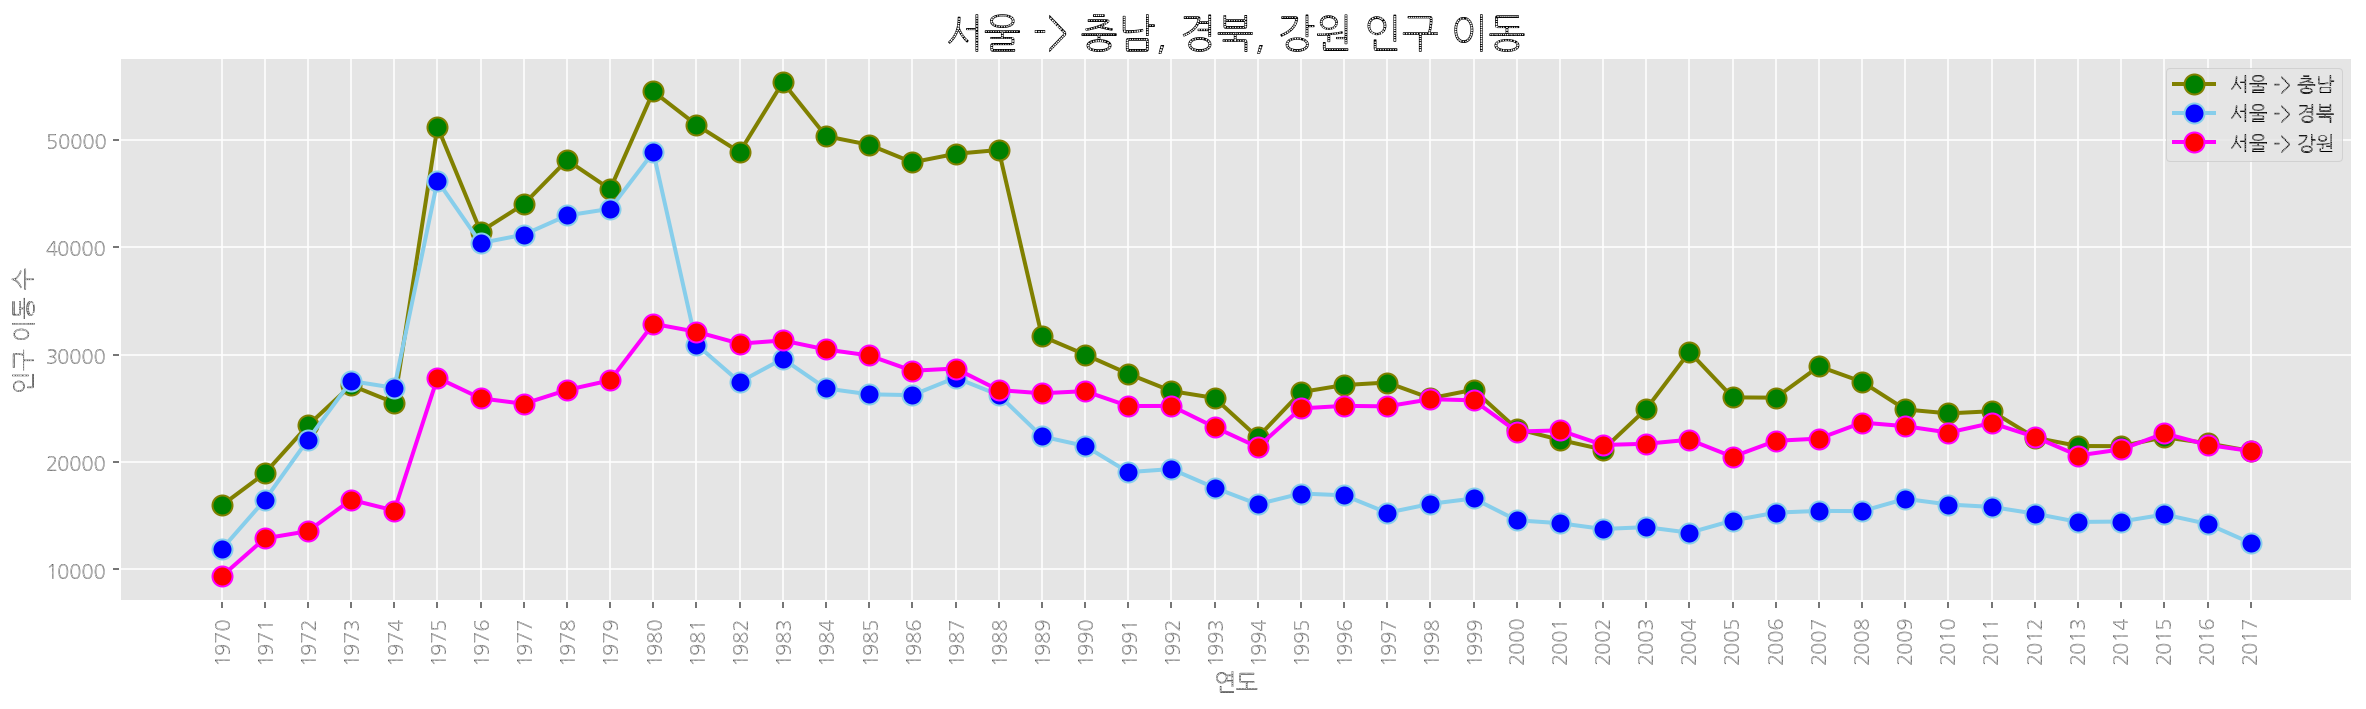

In [18]:
col_years=list(map(str,range(1970,2018)))
df_3=df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

ax.plot(col_years,df_3.loc['충청남도',:],marker='o',markerfacecolor='green',markersize=10,color='olive',linewidth=2,label='서울 -> 충남')
ax.plot(col_years,df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')
ax.plot(col_years,df_3.loc['강원도',:],marker='o',markerfacecolor='red',markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')

ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동',size=20)
ax.set_xlabel('연도',size=12)
ax.set_ylabel('인구 이동 수',size=12)
ax.set_xticklabels(col_years,rotation=90)
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)
plt.show()

Matplotlib에서 사용할 수 있는 색의 종류 확인하는 방법

In [19]:
import matplotlib

colors={}

for name,hex in matplotlib.colors.cnames.items():
  colors[name]=hex

print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

## 면적 그래프

면적 그래프는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀진다.

색의 투명도(alpha)는 기본값 0.5로 투과되어 보인다.

plot메소드에 kind='area' 옵션을 추과하면 간단하게 그릴 수 있다.

면적 그래프는 stacked 매개변수가 기본값으로 True로 지정되어있다.

이 매개변수를 지정하면 각 열의 선그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현된다.



In [20]:
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,29993,28211,26600,25958,22293,26501,27159,27395,25928,26726,23083,22056,21155,24942,30246,26012,25986,28898,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,21490,19054,19342,17604,16067,17064,16899,15271,16103,16604,14576,14303,13762,13938,13414,14550,15285,15448,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,26591,25208,25215,23244,21384,24987,25221,25178,25840,25741,22832,22941,21582,21696,22071,20483,21969,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


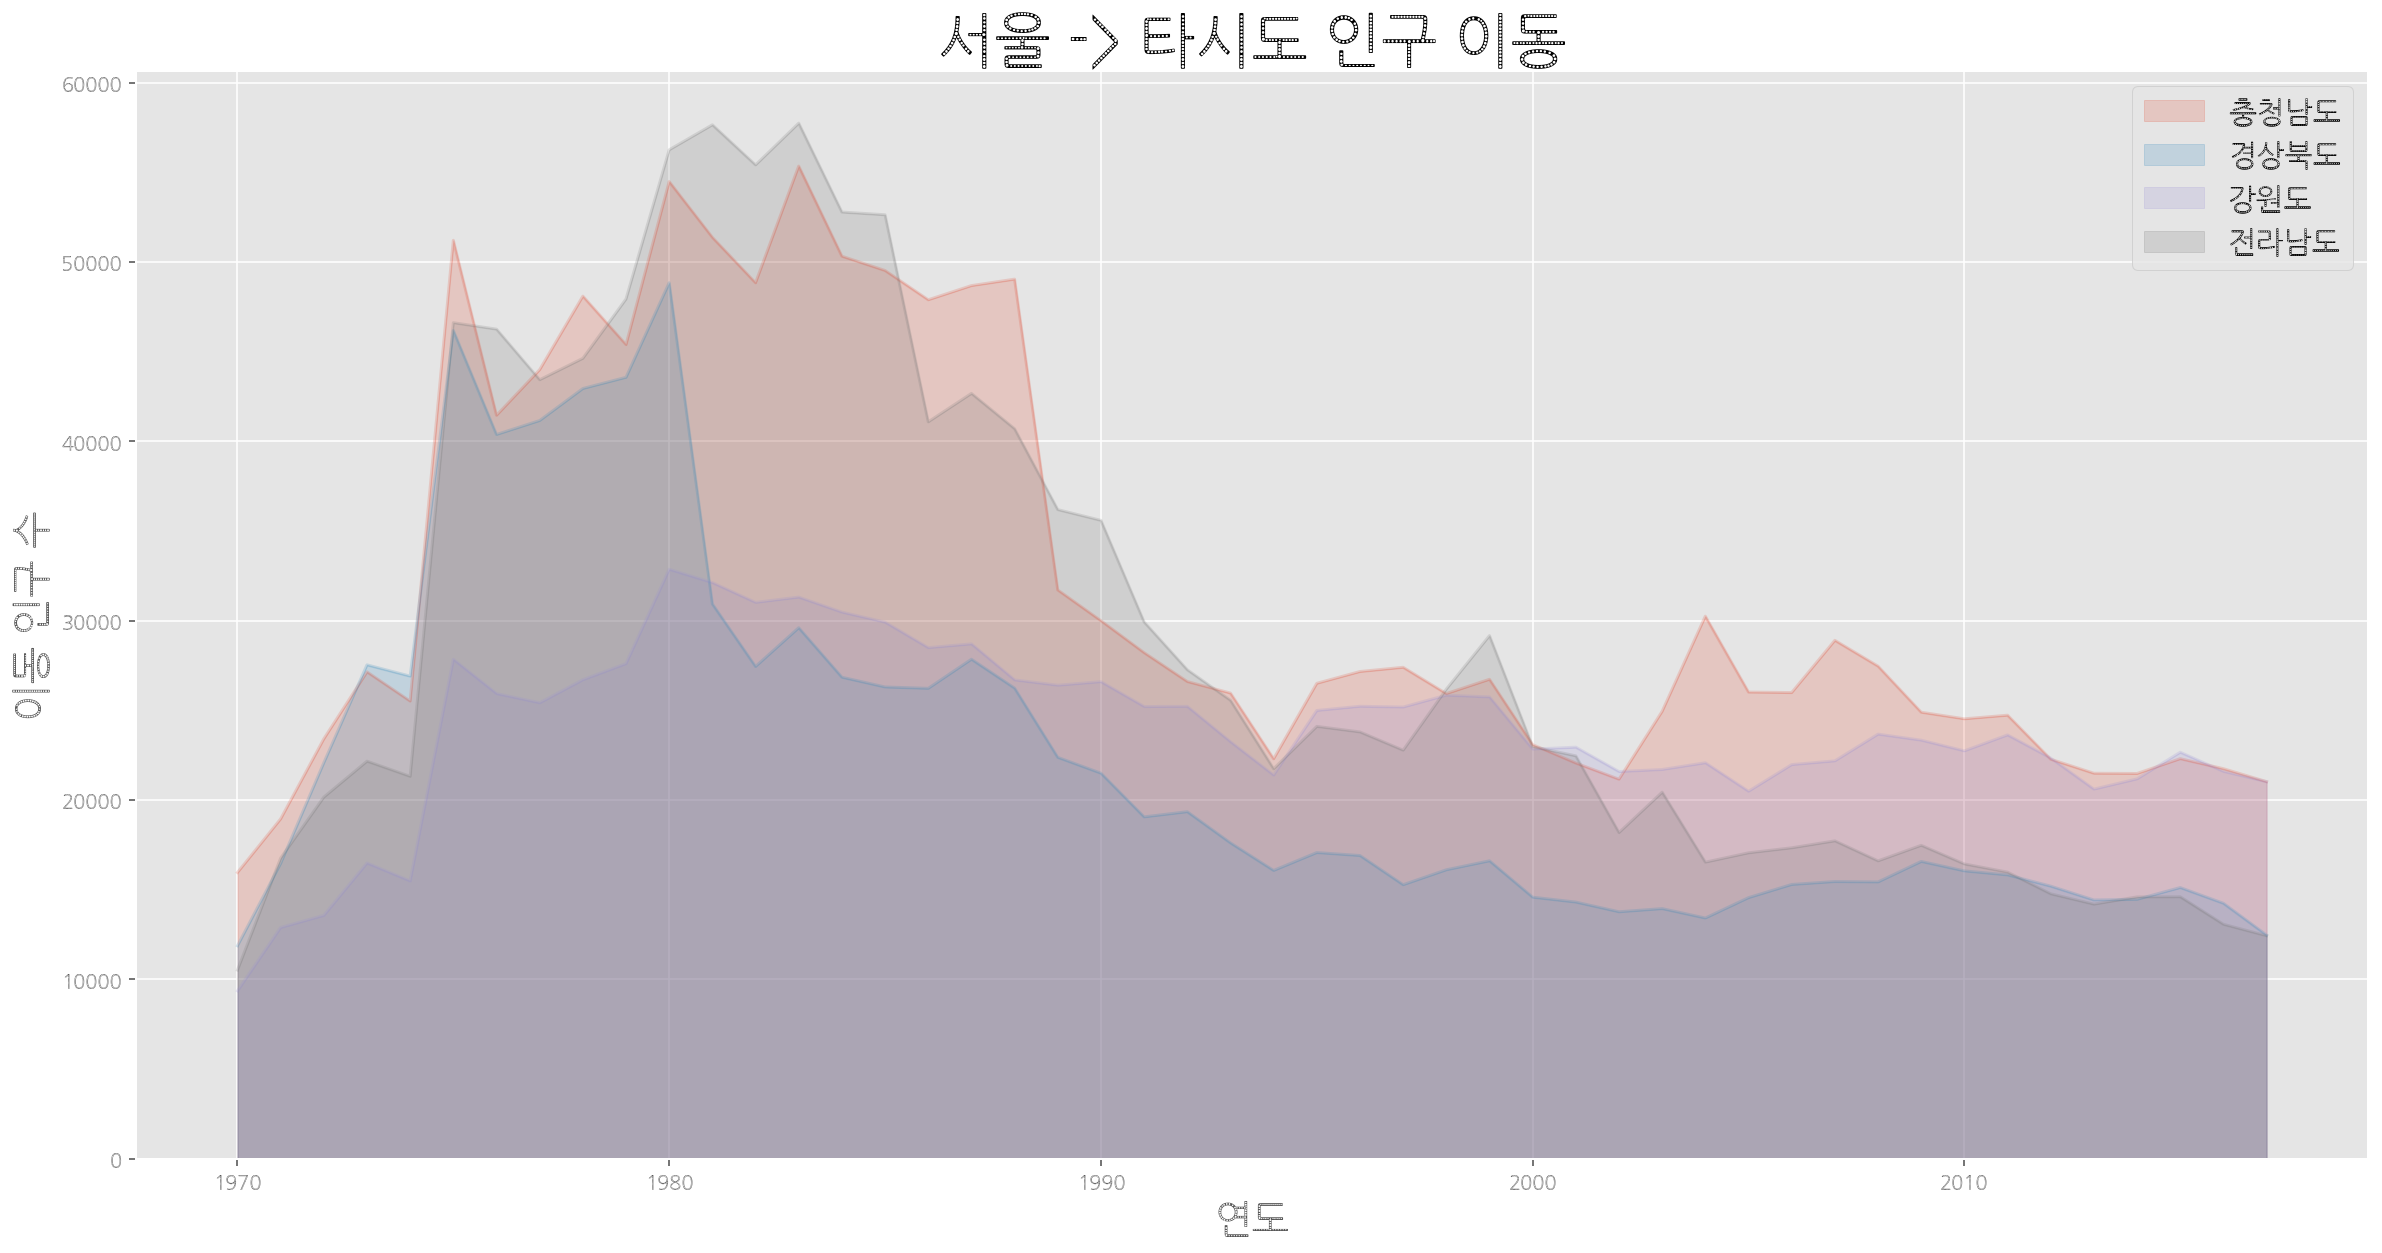

In [21]:
df_4=df_4.transpose()
df_4.index=df_4.index.map(int)
df_4.plot(kind='area',stacked=False,alpha=0.2,figsize=(20,10))
plt.title('서울 -> 타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('연도',size=20)
plt.legend(loc='best',fontsize=15)
plt.show()

## 막대 그래프

막대 그래프는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현한다.

막대 높이의 상대적 길이 차이를 통해 크고 작음을 설명한다. 

세로형 막대 그래프는 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명한다. kind='bar' 옵션을 입력한다.

가로형 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는데 적합하다.
kind='hbar' 옵션을 입력한다.

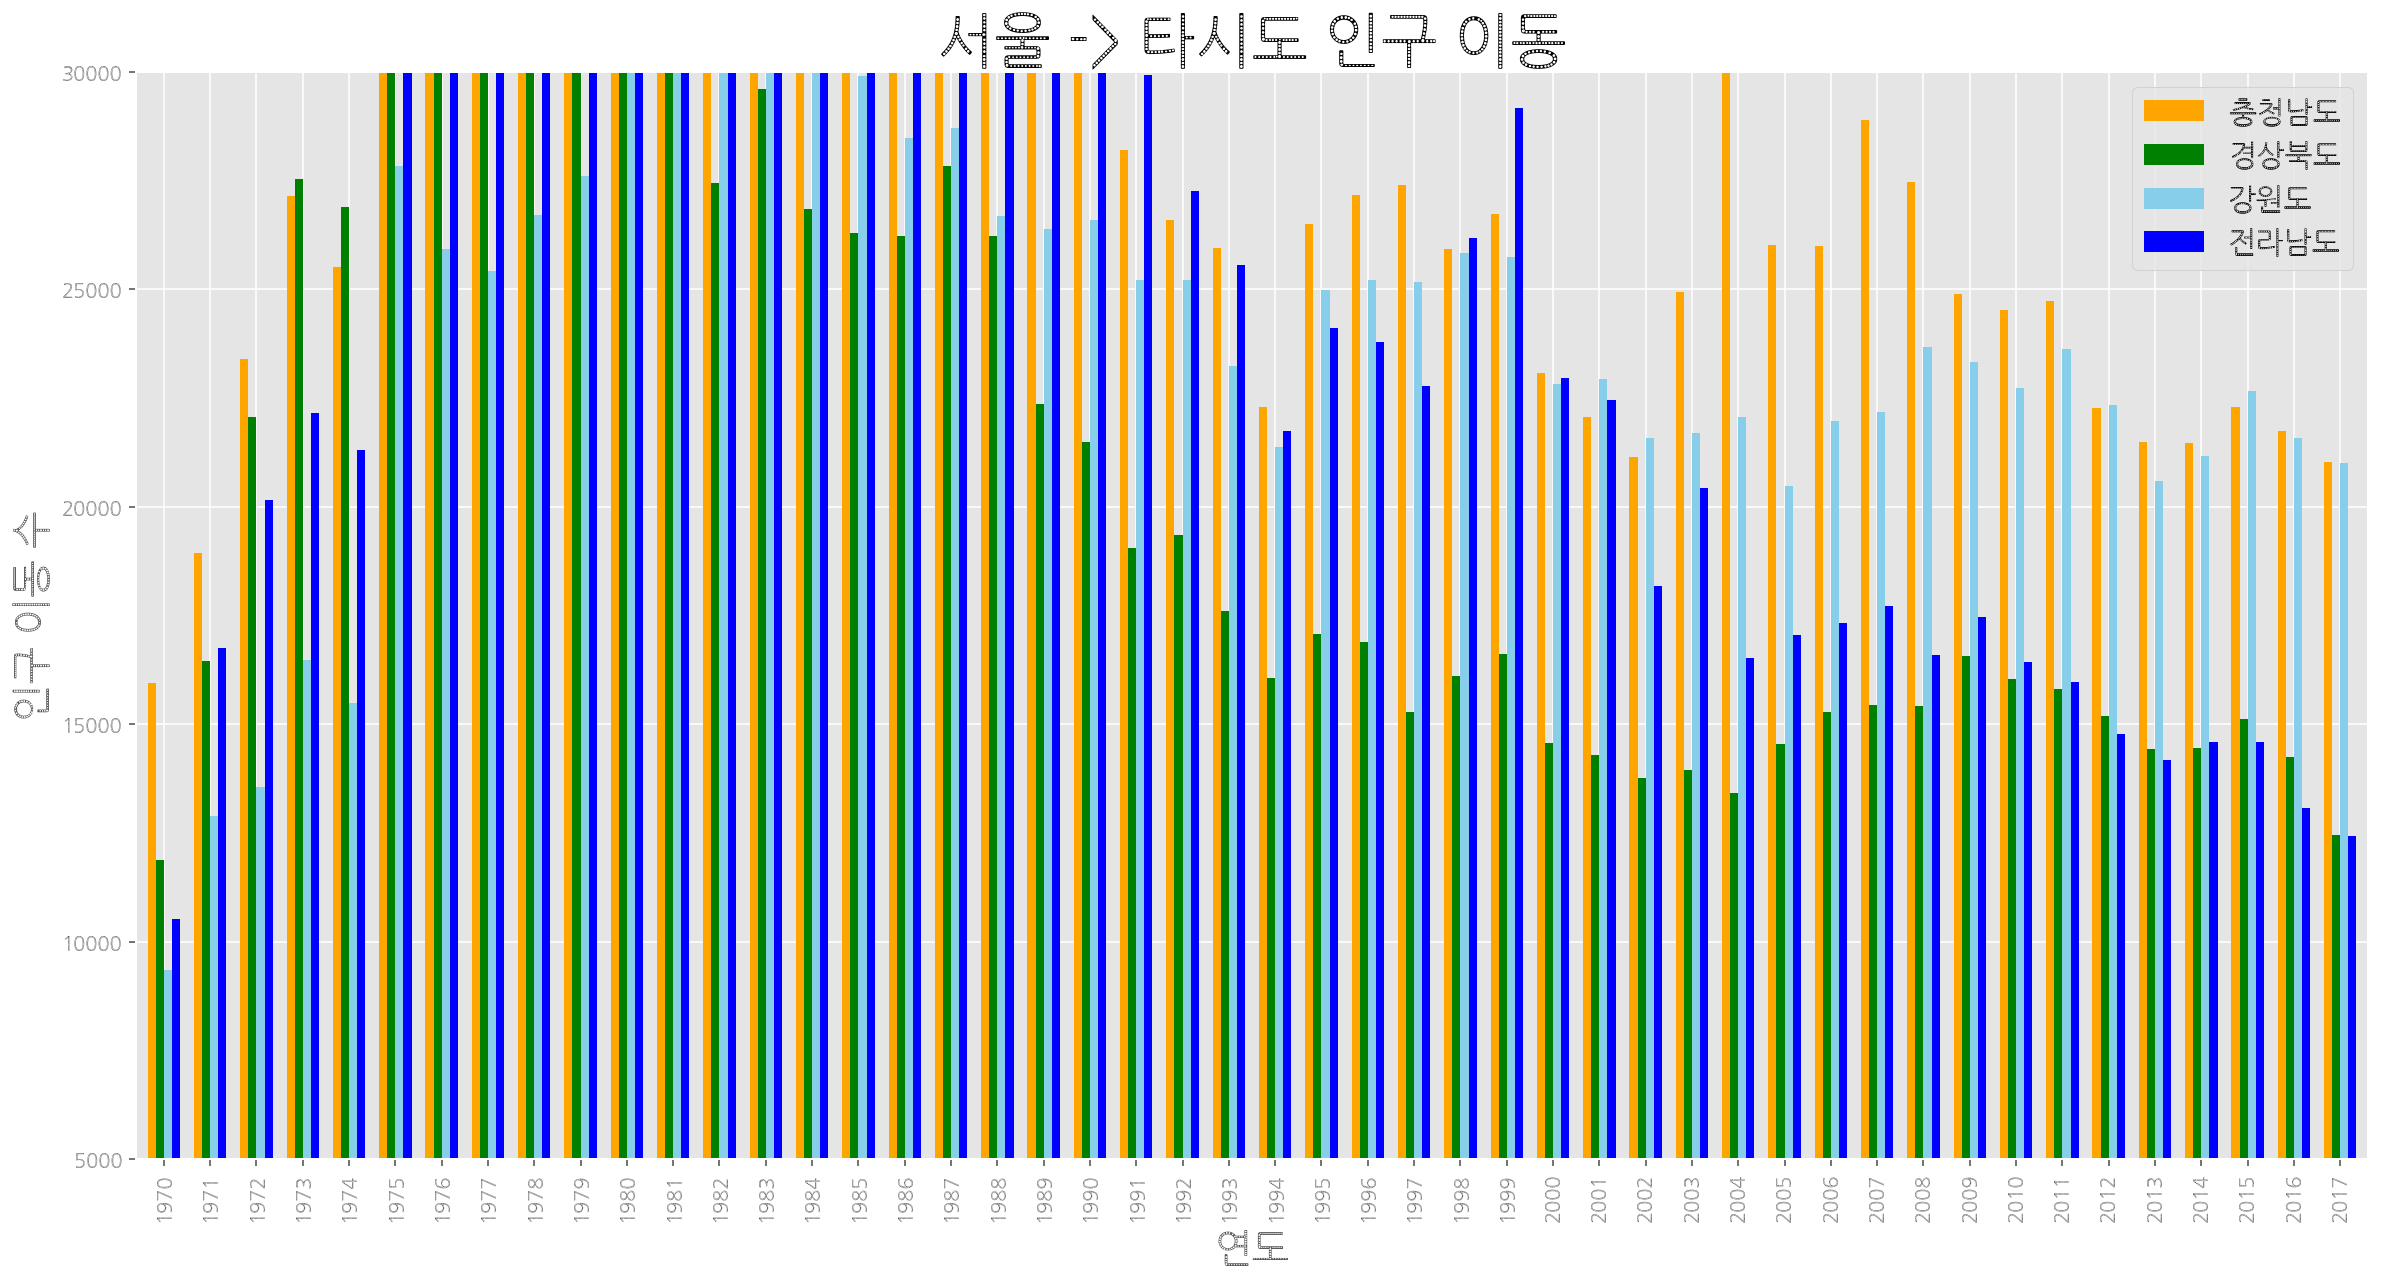

In [22]:
df_4.plot(kind='bar',figsize=(20,10),width=0.7,color=['orange','green','skyblue','blue'])
plt.title('서울 -> 타시도 인구 이동',size=30)
plt.xlabel('연도',size=20)
plt.ylabel('인구 이동 수',size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)

plt.show()

            합계
전입지           
전라남도  116035.0
경상북도  117740.0
강원도   175731.0
충청남도  179533.0


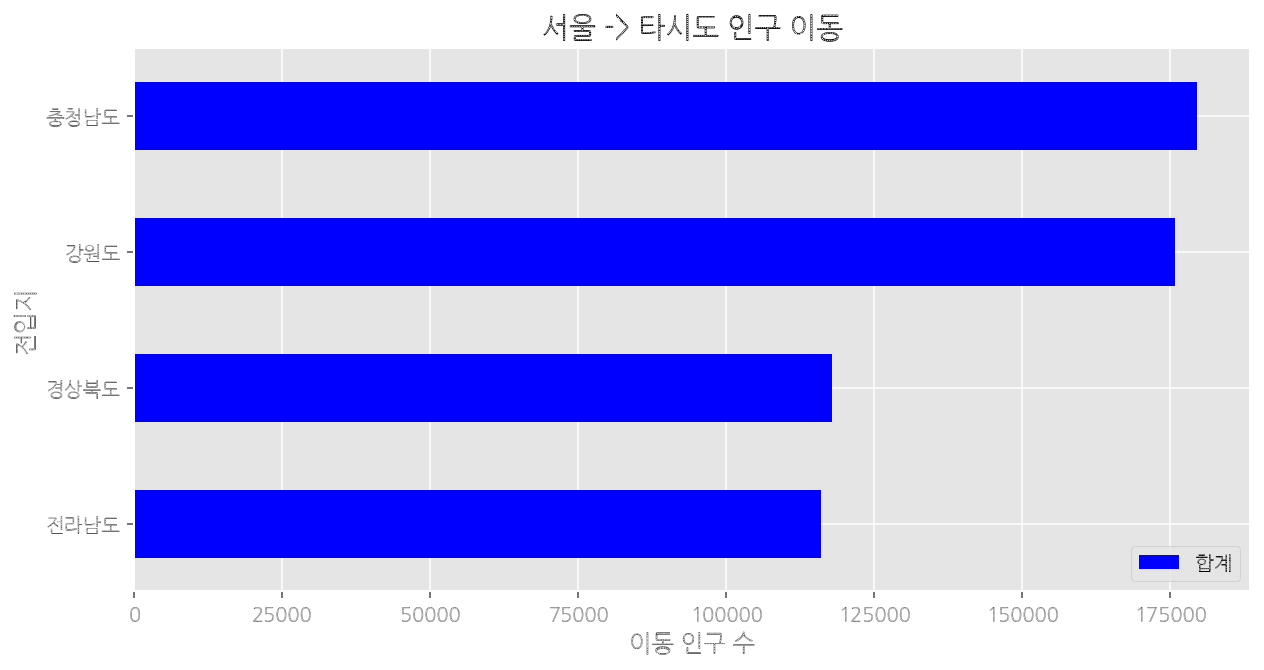

In [23]:
col_years=list(map(str,range(2010,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4['합계']=df_4.sum(axis=1)
df_total=df_4[['합계']].sort_values(by='합계',ascending=True)
print(df_total)
df_total.plot(kind='barh',color='blue',width=0.5,figsize=(10,5))
plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')
plt.show()

### 2축 그래프 그리기

지금까지 그래프를 그릴 때 y축을 한 개만 사용하였다.

Excel 에서 차트를 그릴 때처럼 보조 축을 추가하여 2개의 y축을 갖는 그래프를 그릴 수 있다.

여기서 사용할 데이터는 남북한 발전량 데이터 셋(통계청 제공)을 사용하는데, 기존 축에는 막대그래프를 보조 축에는 선 그래프를 표현하겠다.

막대 그래프는 연도별 북한의 발전량을 나타내고, 선 그래프는 북한 발전량의 전년도 대비 증감률을 백분률로 나타낸다.

In [24]:
df=pd.read_excel('남북한발전전력량.xlsx',convert_float=True)
df=df.loc[5:9]
df.drop('전력량 (억㎾h)',axis=1,inplace=True)
df.set_index('발전 전력별',inplace=True)
df=df.T
print(df.head())

발전 전력별   합계   수력   화력 원자력
1990    277  156  121   -
1991    263  150  113   -
1992    247  142  105   -
1993    221  133   88   -
1994    231  138   93   -


In [25]:
df=df.rename(columns={'합계':'총발전량'})
df['총발전량-1년']=df['총발전량'].shift(1)
df['증감률']=((df['총발전량']/df['총발전량-1년'])-1)*100
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.05415
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.5263
1994,231,138,93,-,221,4.52489


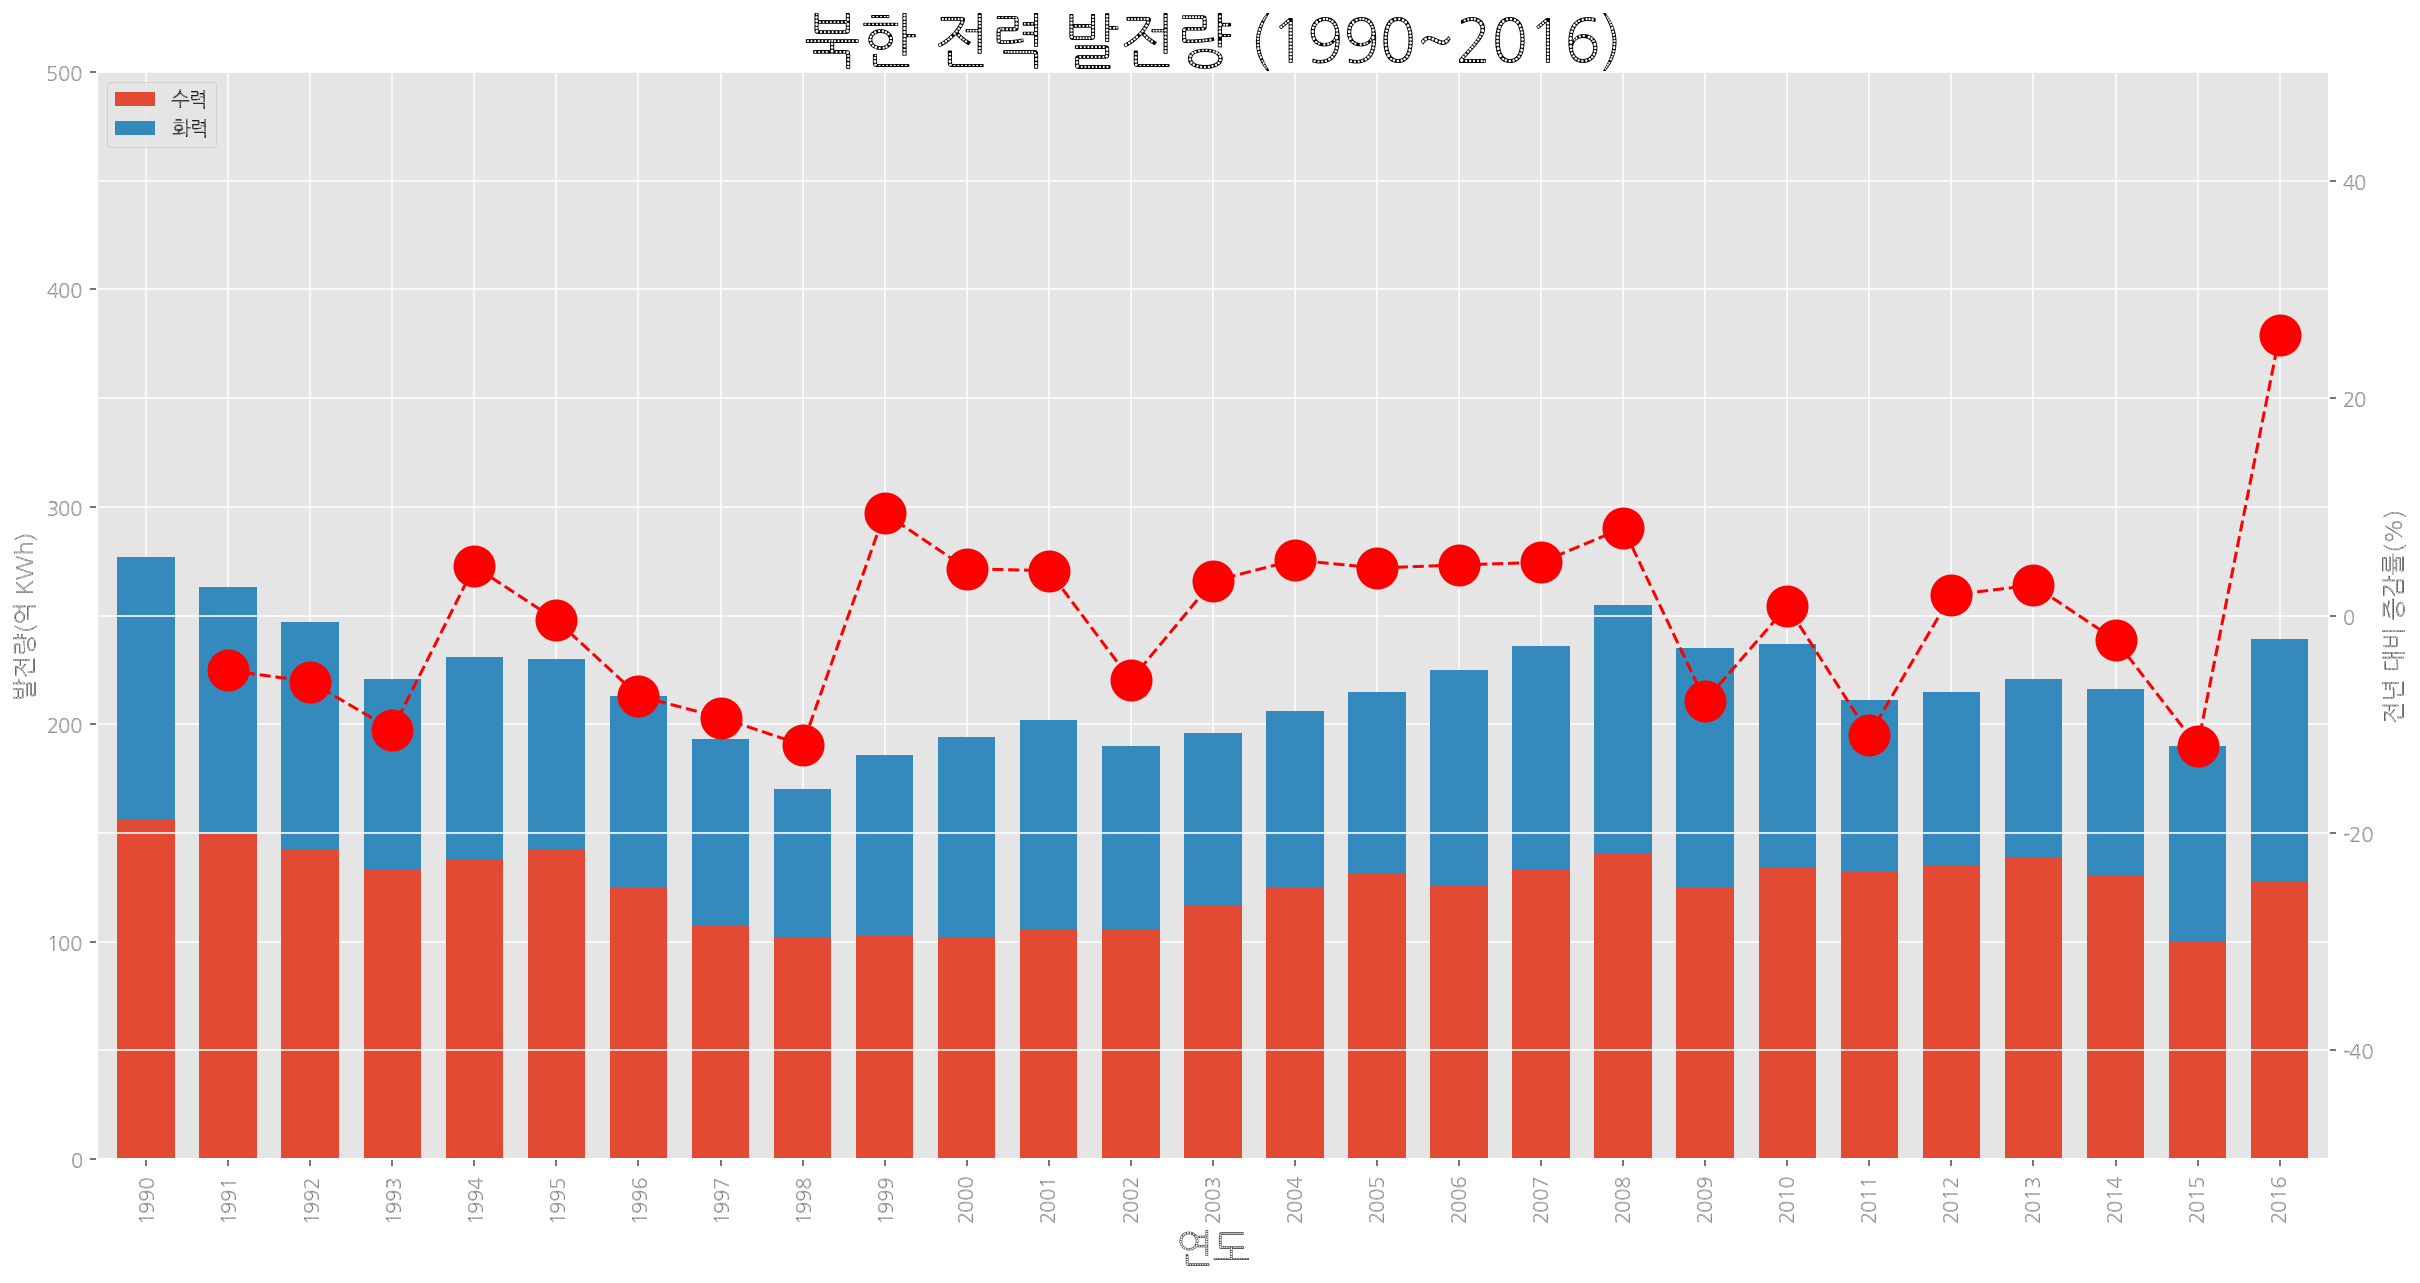

In [26]:
plt.rcParams['axes.unicode_minus']=False
ax1=df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
# twinx() 메소드를 활용하여 쌍둥이 객체를 만들어 2축 그래프를 만든다.
ax2=ax1.twinx()
ax2.plot(df.index,df.증감률,ls='--',marker='o',markersize=20,color='red',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)',size=30)
ax1.legend(loc='upper left')

plt.show()

## 히스토그램

히스토그램은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다.

x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수를 y축에 표시한다.

데이터는 UCI 자동차 연비 데이터셋을 사용한다.

In [27]:
plt.style.use('classic')
df=pd.read_csv('auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


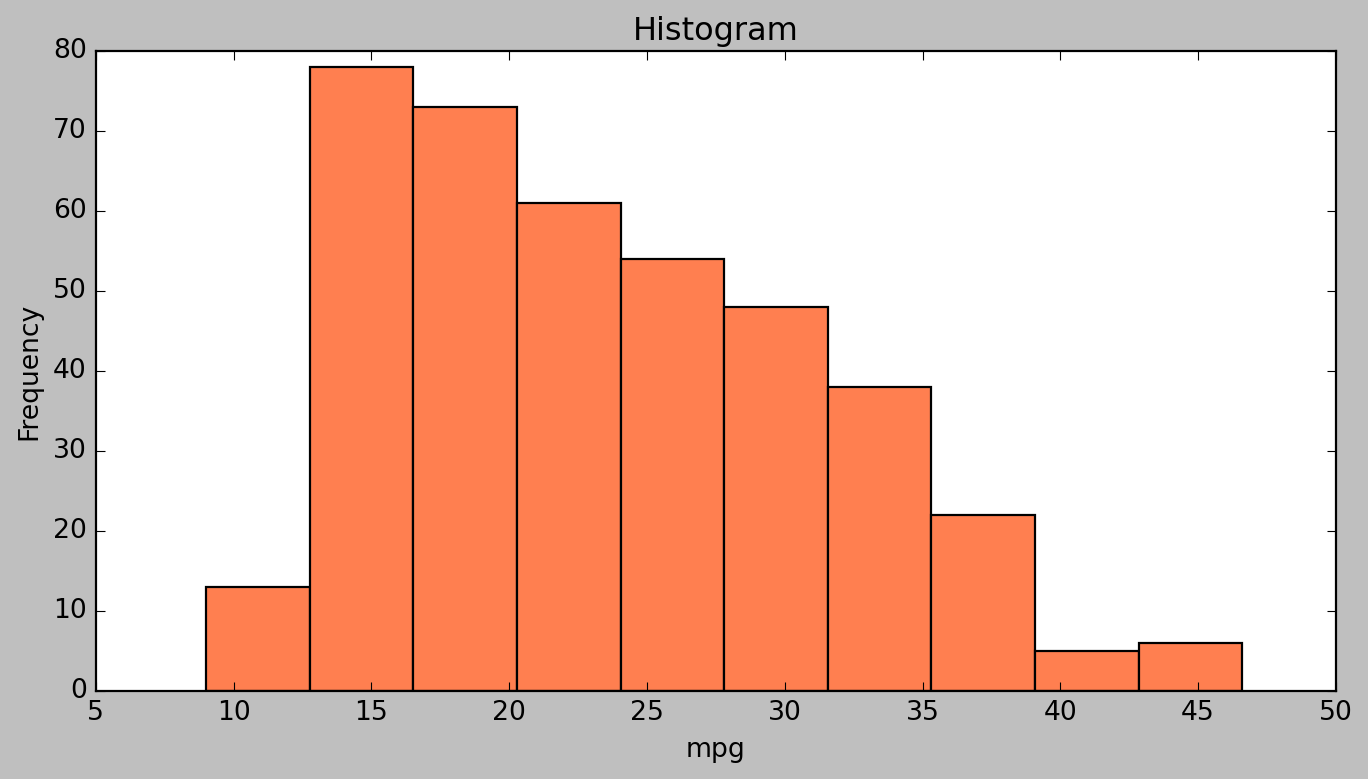

In [28]:
df.mpg.plot(kind='hist',bins=10,color='coral',figsize=(10,5))
plt.title('Histogram')
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.show()

## 산점도

산점도는 서로 다른 두 변수 사이의 관계를 나타낸다.

plot() 메소드 kind 매개변수에 scatter를 지정하면 된다.

점의 색상은 c 매개변수를 사용하고 크기는 s 매개변수를 사용해서 지정한다.

데이터는 auto-mpg.csv를 이어서 사용하겠다. 

In [29]:
plt.style.use('default')
df=pd.read_csv('auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


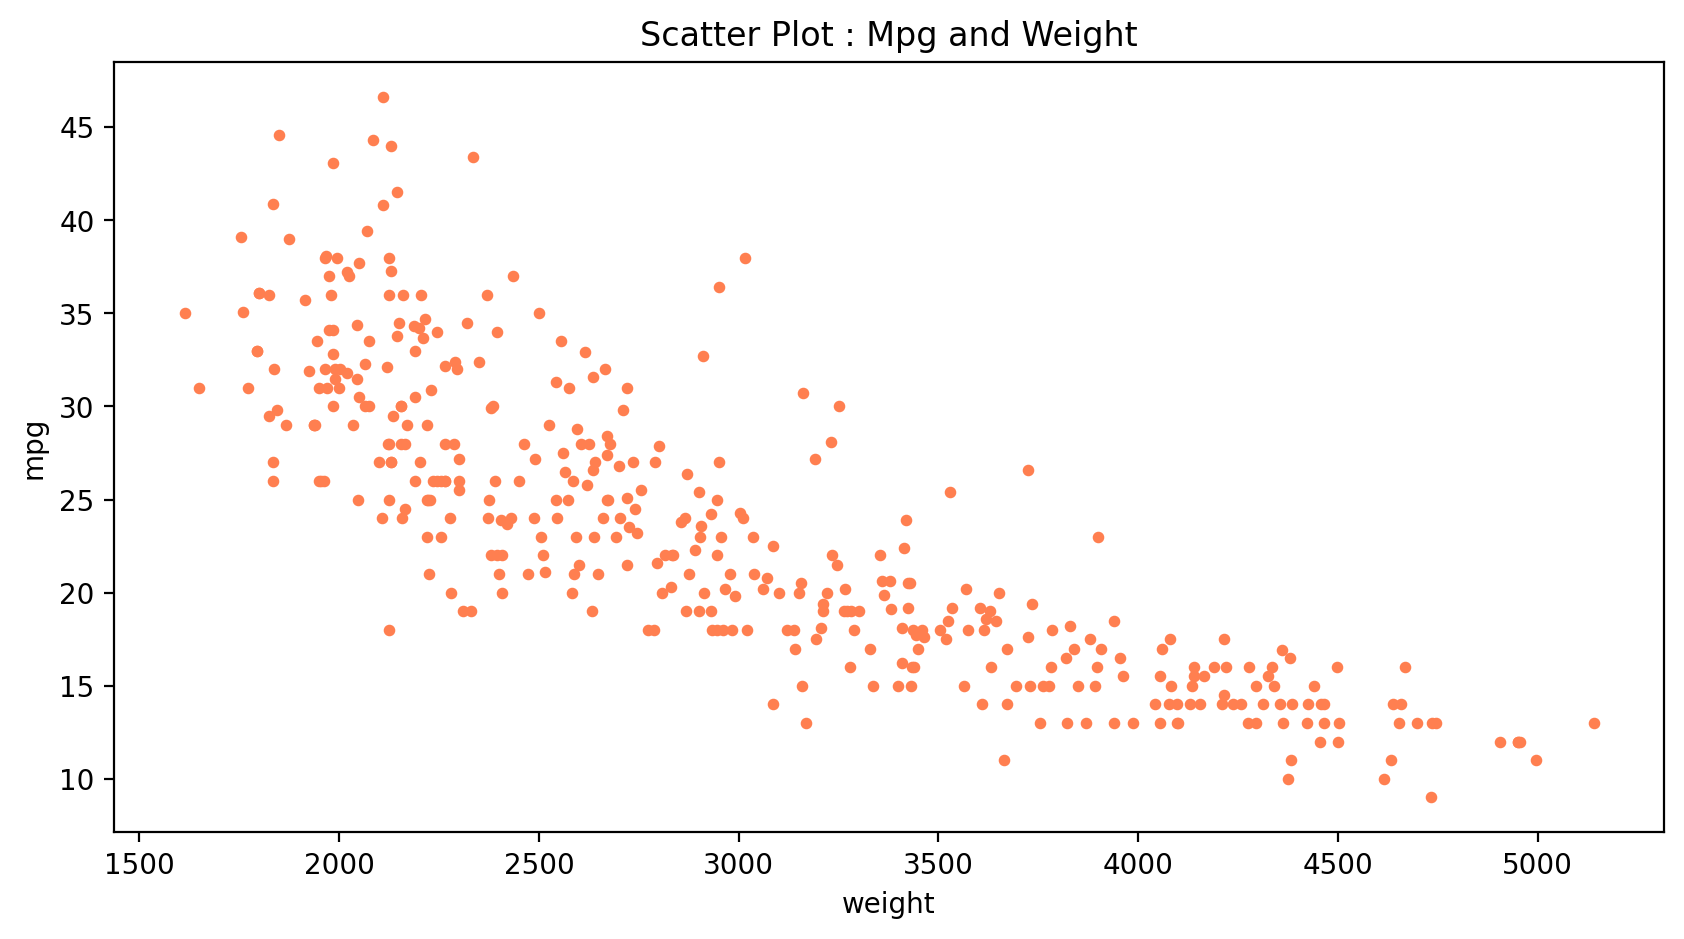

In [30]:
df.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.title('Scatter Plot : Mpg and Weight')
plt.show()

앞에서 자동차 무게와 연비 사이의 관계를 산점도로 표현하였다.

여기에 새로운 변수를 추가해서 점의 크기 또는 색상을 표현할 수 있다.

여기서는 3번째 변수로 실린더 개수를 추가한다.

실린더 개수를 나타내는 정수를 그대로 쓰는 대신, 해당 열의 최대값 대비 상대적 크기를 나타내는 비율을 계산하여 사용하겠다.

점의 크기에 이 변수를 사용하여 값의 크기에 따라 점의 크기가 달라진다.

이처럼 점의 크기에 변화를 주면 모양이 비눗방울 같다고 하여, **버블 차트**라고 부르기도 한다.

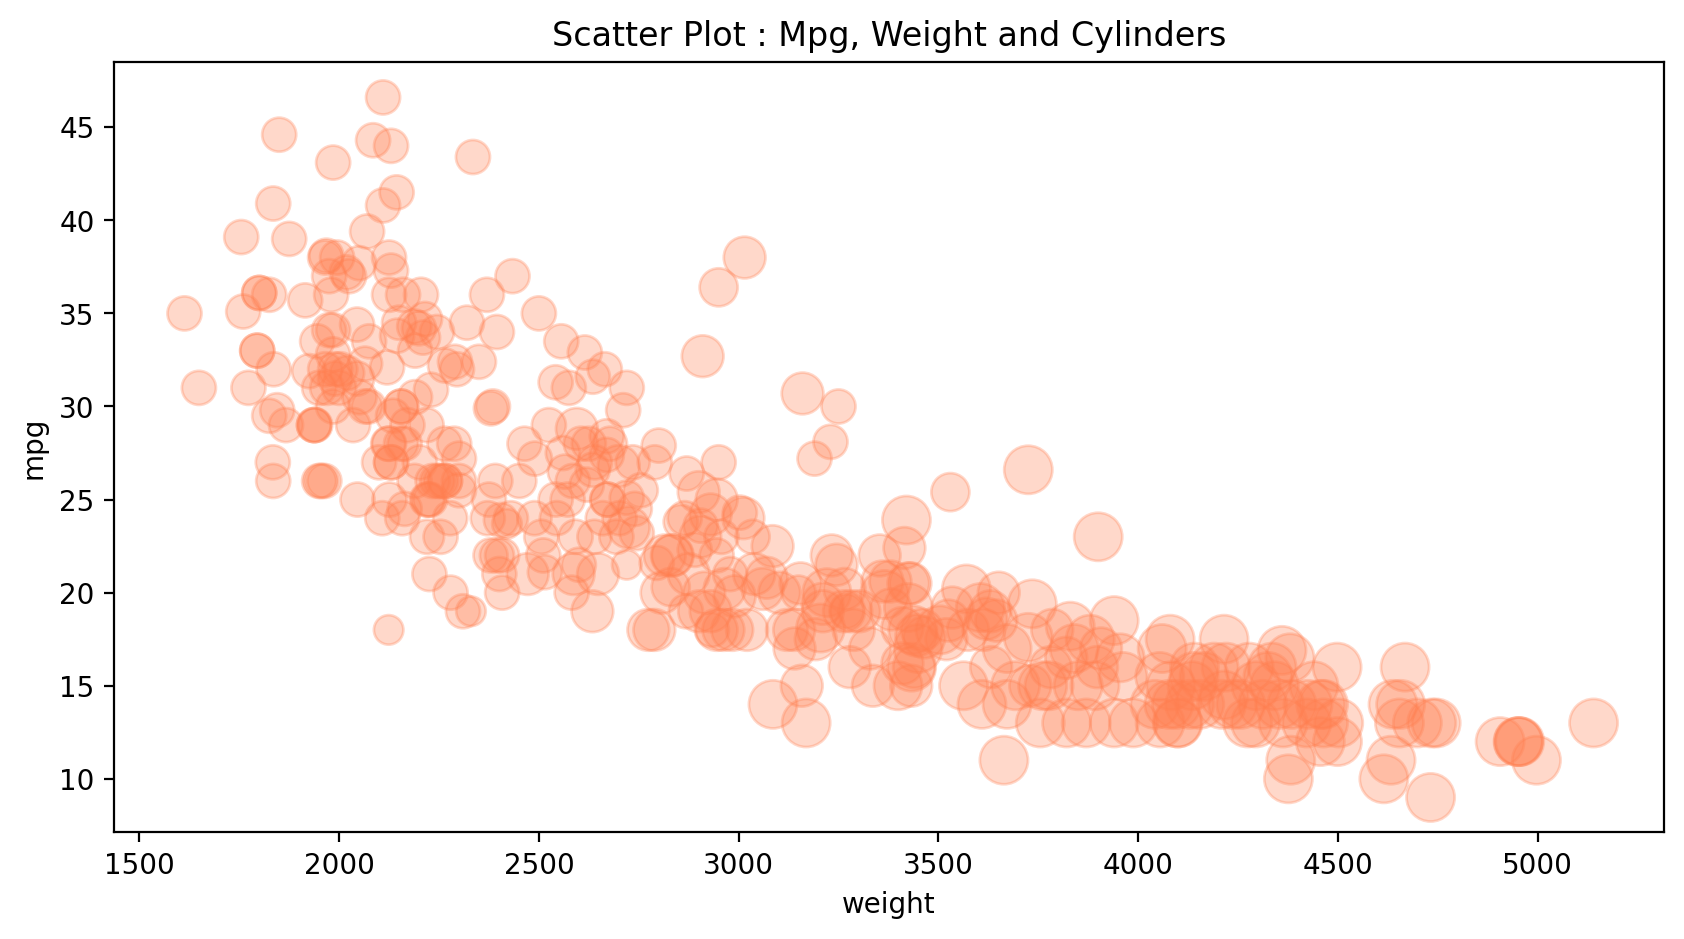

In [31]:
cylinders_size=df.cylinders/df.cylinders.max() * 300
df.plot(kind='scatter',x='weight',y='mpg',c='coral',figsize=(10,5),s=cylinders_size,alpha=0.3)
plt.title('Scatter Plot : Mpg, Weight and Cylinders')
plt.show()

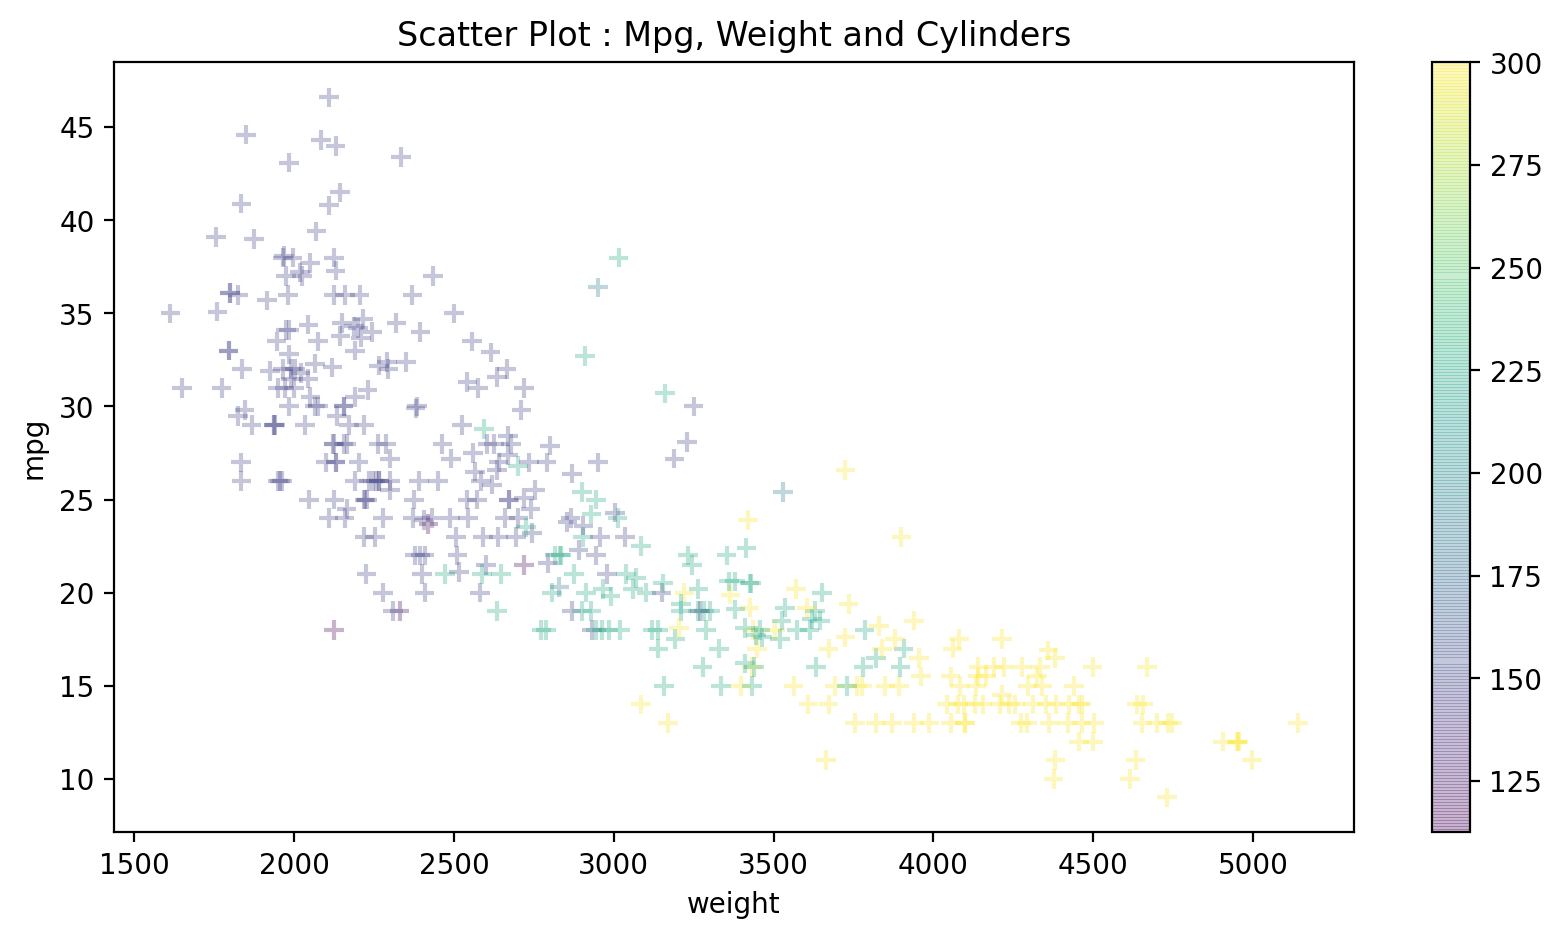

In [32]:
df.plot(kind='scatter',x='weight',y='mpg',marker='+',figsize=(10,5),cmap='viridis',c=cylinders_size,s=50,alpha=0.3)
plt.title('Scatter Plot : Mpg, Weight and Cylinders')
plt.show()

** 그래프를 그림 파일로 저장**

Matplotlib 라이브러리로 생성한 그래프를 그림 파일로 저장하는 방법이다.

savefig() 함수에 저장하려는 파일의 이름과 파일 경로를 설정한다.

transparent 매개변수를 지정하면 그림 배경을 투명하게 지정하여 저장한다.

위 그림에서 색상을 정하는 컬러맵으로 **viridis** 옵션을 사용했다.

컬러맵 참조 사이트 : https://matplotlib.org/tutorials/colors/colormaps.html

## 파이 차트

파이 차트는 원을 파이 조각처럼 나누어서 표현한다.

조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례한다.

plot() 메소도의 kind 매개변수에 pie 옵션을 사용하여 그린다.

아래에서는 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 열을 만들고, groupby 메소드를 이용하여 origin 값을 기준으로 그룹을 만들고, sum 메소드를 사용하여 새로운 변수에 저장한다.

In [33]:
plt.style.use('default')
df=pd.read_csv('auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df['count']=1
print(df.head())
df_origin=df.groupby('origin').sum()
print(df_origin.head())

    mpg  cylinders  displacement  ... origin                       name  count
0  18.0          8         307.0  ...      1  chevrolet chevelle malibu      1
1  15.0          8         350.0  ...      1          buick skylark 320      1
2  18.0          8         318.0  ...      1         plymouth satellite      1
3  16.0          8         304.0  ...      1              amc rebel sst      1
4  17.0          8         302.0  ...      1                ford torino      1

[5 rows x 10 columns]
           mpg  cylinders  displacement  ...  acceleration  model year  count
origin                                   ...                                 
1       5000.8       1556       61229.5  ...        3743.4       18827    249
2       1952.4        291        7640.0  ...        1175.1        5307     70
3       2405.6        324        8114.0  ...        1277.6        6118     79

[3 rows x 7 columns]


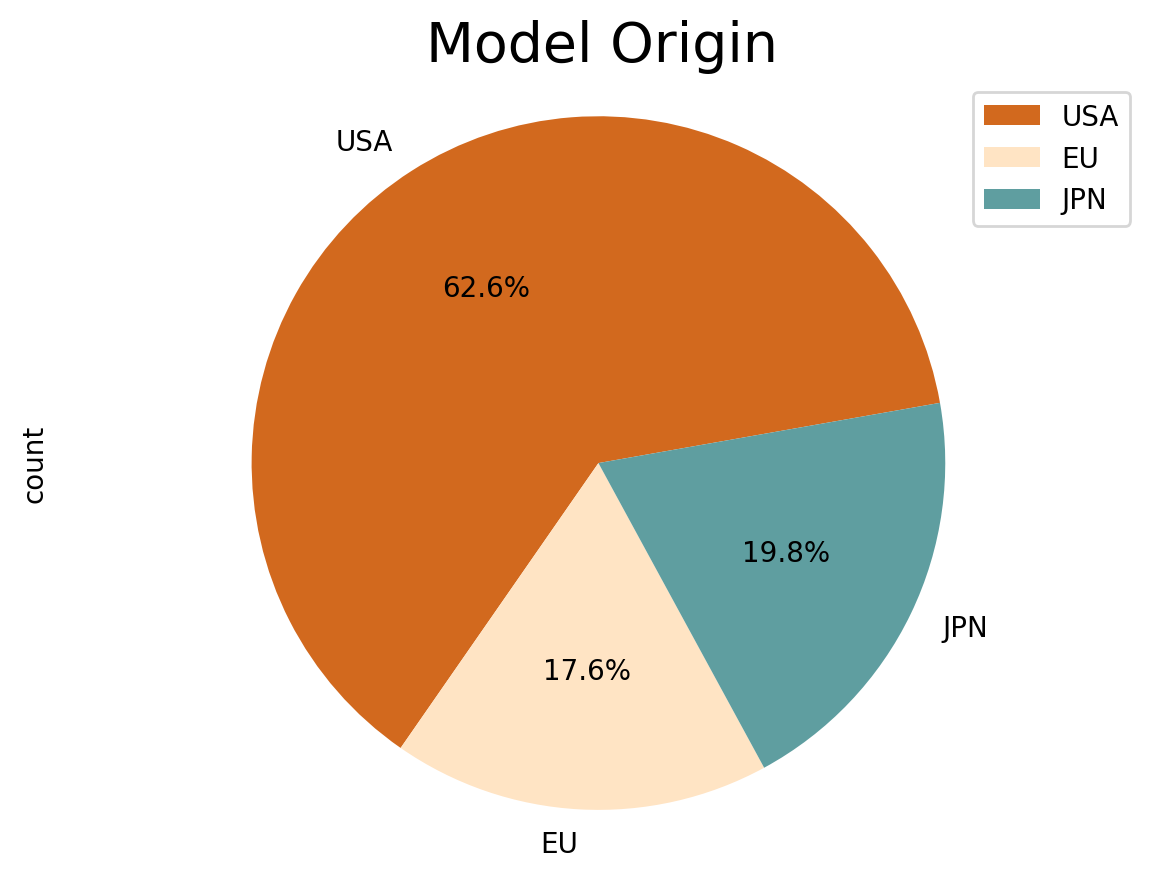

In [34]:
df_origin.index=['USA','EU','JPN']
df_origin['count'].plot(kind='pie',
               figsize=(7,5),
               autopct='%1.1f%%', # 퍼센트 % 표시
               startangle=10, # 파이 조각을 나누는 시작점 (각도 표시)
               colors=['chocolate','bisque','cadetblue'] # 색상 리스트
               )

plt.title('Model Origin',size=20)
plt.axis('equal') # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index,loc='upper right')
plt.show()

## 박스 플롯

박스 플롯은 범주형 데이터의 분포를 파악하는데 적합하다.

박스 플롯은 5개의 통계 지표를 제공한다. 

맨 위와 맨 아래는 최대값과 최소값을 제공하고 박스의 윗 부분은 3분위값, 아랫부분은 1분위값, 박스 중간 선은 중간값을 제공한다.

데이터는 auto-mpg.csv 를 사용하여, 제조국가별 연비 분포를 보여주는 박스 플롯을 그린다.

각 ax 객체에 박스 플롯을 그리는 boxplot() 메소드를 적용한다.

'origin' 값이 1,2,3인 데이터들의 mpg열의 분포를 구해본다.

박스 플롯에 넣을 열 3개를 리스트에 담아서 x 옵션에 할당한다.

NanumGothic Eco


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


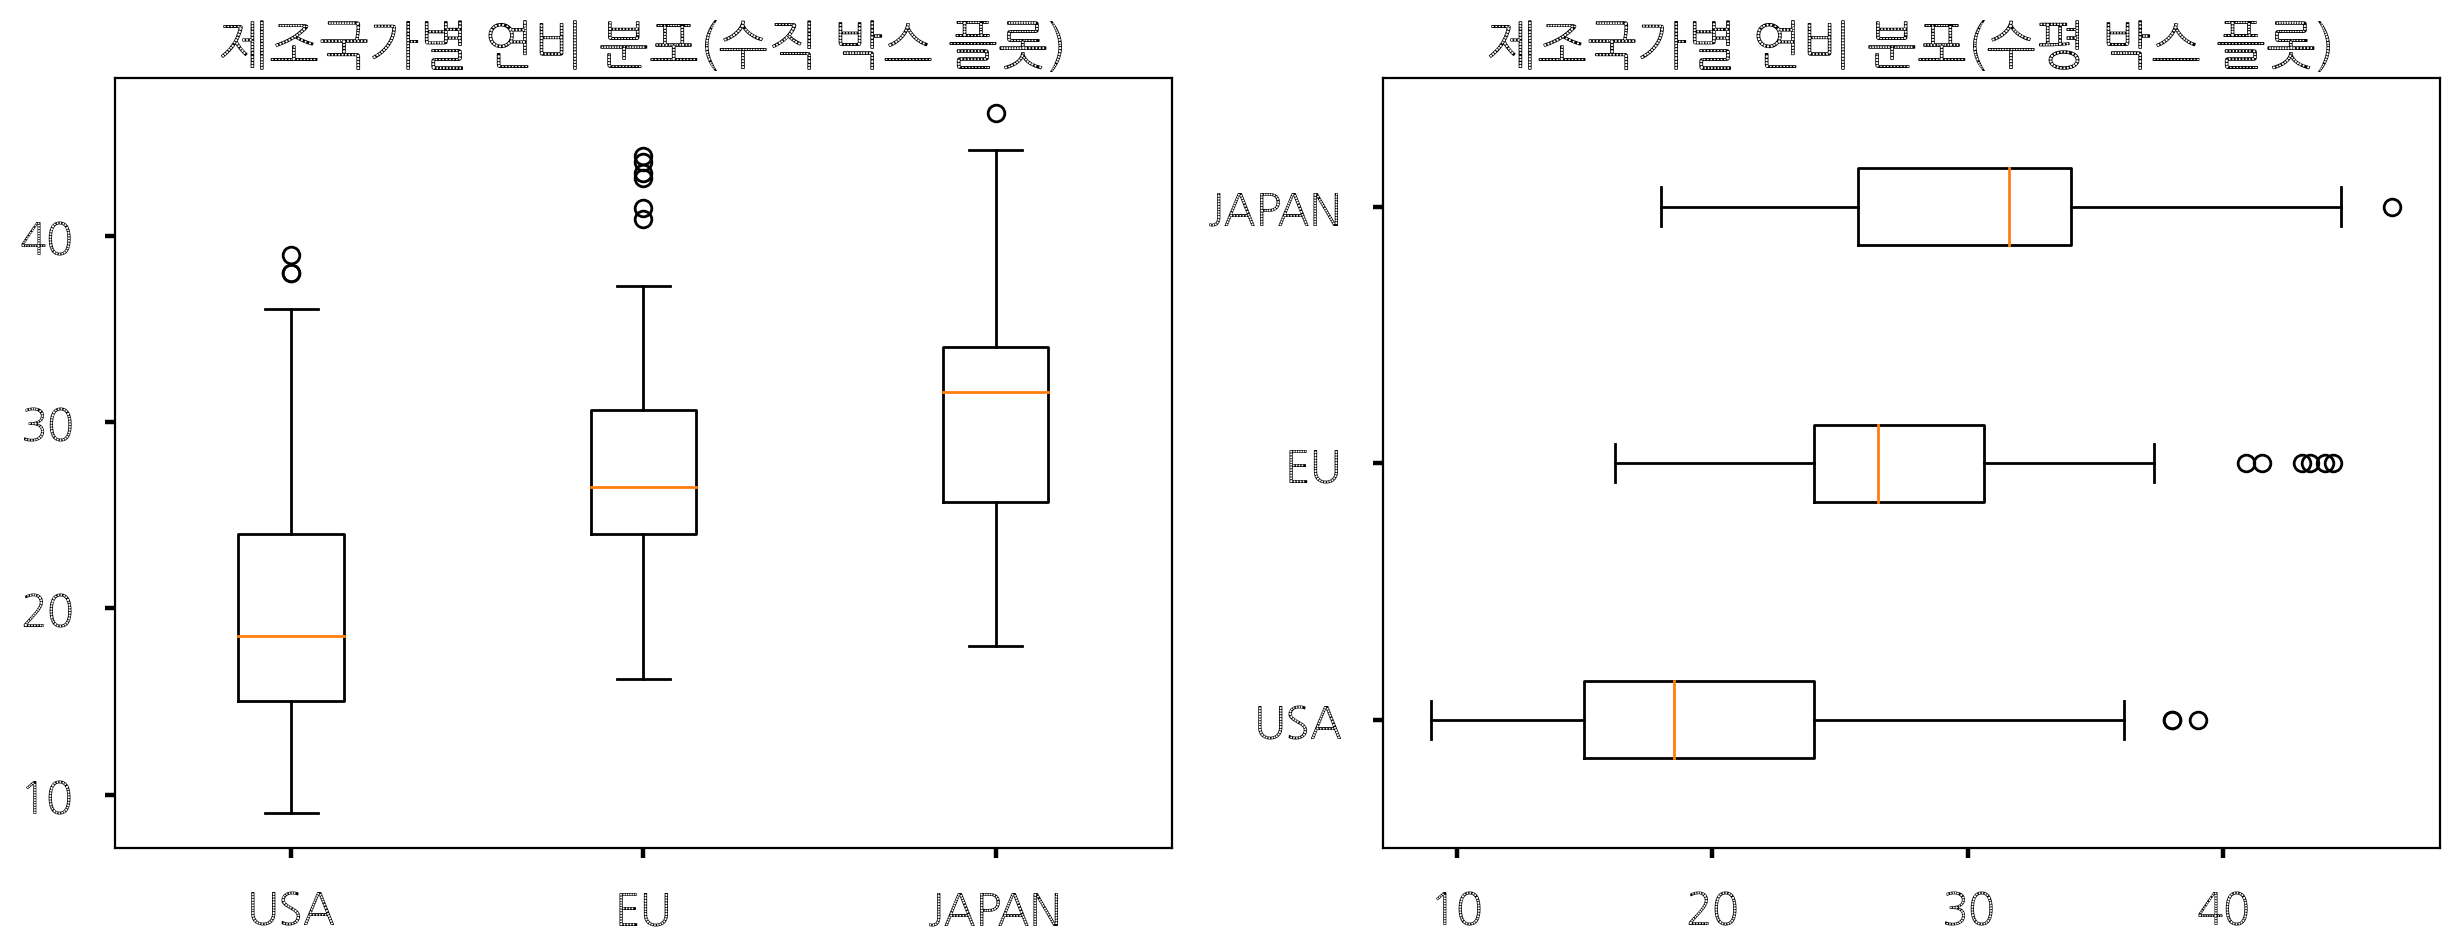

In [36]:
from matplotlib import rc
path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
rc('font',family=font_name)
fm._rebuild()
%config InlineBackend.figure_format= 'retina'

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']=False
df=pd.read_csv('auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

파이썬으로 그릴 수 있는 다양한 그래프와 설정 옵션을 참조할 수 있는 사이트

여러 가지 유용한 그래프 샘플과 실행 코드를 많이 담고 있다.

https://python-graph-gallery.com